# Analystics Vidhya Competitions
## Predict Black Friday Sales

**Data Point**

|Variable|Definition|
|--------|----------|
|User_ID | User ID |
|Product_ID | Product ID |
|Gender | Sex of User |
|Age | Age in bins |
|Occupation | Occupation (Masked) |
|City_Category | Category of the City (A,B,C) |
|Stay_In_Current_City_Years | Number of years stay in current city |
|Marital_Status | Marital Status |
|Product_Category_1 | Product Category (Masked) |
|Product_Category_2 | Product may belongs to other category also (Masked) |
|Product_Category_3 | Product may belongs to other category also (Masked) |
|Purchase | Purchase Amount (Target Variable) |

**Objective**

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## 1. Data Collection

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## 2. Data Wrangling

In [4]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [6]:
impute = IterativeImputer()

In [7]:
cols = ['Product_Category_2','Product_Category_3']

In [8]:
train[cols] = impute.fit_transform(train[cols])

In [9]:
train.isnull().sum().sum()

0

In [10]:
train[cols] = train[cols].astype('int64')

In [11]:
train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

---

#### Encoding Variable Column

In [12]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

**Changes Column Object into Numeric, so it can be read by ML Model**

|No|Column Name|Var Name|Transform to|Column Name|Var Name|Transform to|
|--|-----------|--------|------------|-----------|--------|------------|
|1 | **Gender**| Female | 0          |**City_Category**|A|0|
|2 |           | Male   | 1          |             |B|1|
|3 |           |        |            |            |C|2|
|# |###########|########|#|##########|#|#|
|1 | **Age** | 0-17 | 0 | **Stay_In_Current_City_Years** | 0 | 0 |
|2 |    | 18-25| 1 |                           | 1 | 1 |
|3 |    | 26-35| 2 |                           | 2 | 2 |
|4 |    | 36-45| 3 |                           | 3 | 3 |
|5 |    | 46-50| 4 |                           | 4+| 4 |
|6 |    | 51-55| 5 |                           |  |  |
|7 |    | 55+  | 6 |                           |  |  |

In [13]:
cols = ['Gender','Age','City_Category','Stay_In_Current_City_Years']

In [14]:
train[cols] = train[cols].apply(encode.fit_transform)

In [15]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9,14,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9,14,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,16,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9,14,7969


In [16]:
feat = train[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']]

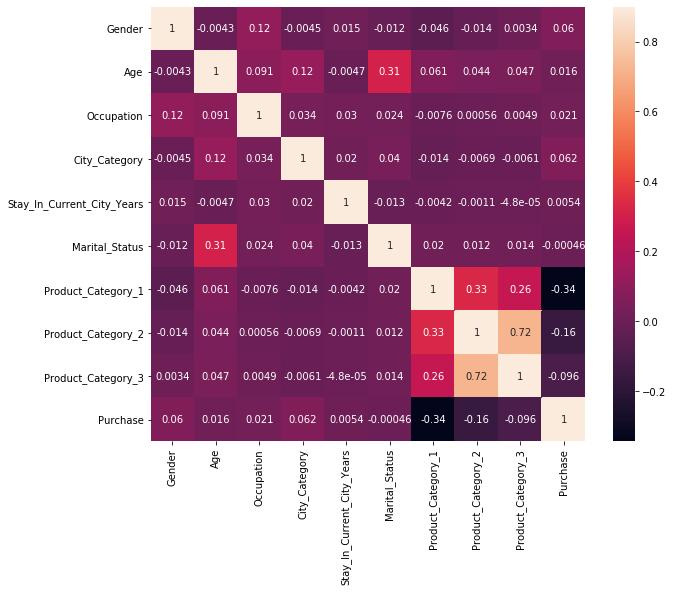

In [17]:
cor = feat.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=cor,vmax=0.9,square=True,annot=True)
plt.show()

In [18]:
cor['Purchase'].sort_values()

Product_Category_1           -0.343703
Product_Category_2           -0.156676
Product_Category_3           -0.096042
Marital_Status               -0.000463
Stay_In_Current_City_Years    0.005422
Age                           0.015839
Occupation                    0.020833
Gender                        0.060346
City_Category                 0.061914
Purchase                      1.000000
Name: Purchase, dtype: float64

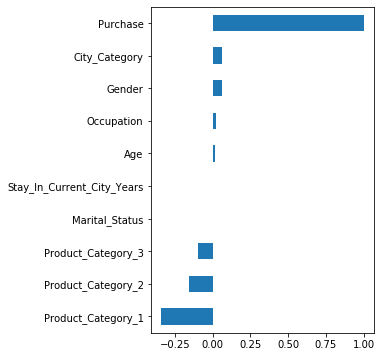

In [19]:
barh = cor['Purchase'].sort_values()
plt.figure(figsize=(4,6))
barh.plot(kind='barh')
plt.show()

Based on Correlation Matrix above, we can see that the column "Stay_In_Current_City_Years" and "Marital_Status" is not have significant impact to Target Value (Purchase). So we don't use that column to Model Machine Learning.

In [20]:
train.drop(columns=['Stay_In_Current_City_Years','Marital_Status'],axis=1,inplace=True)

---

#### Handling Outlier

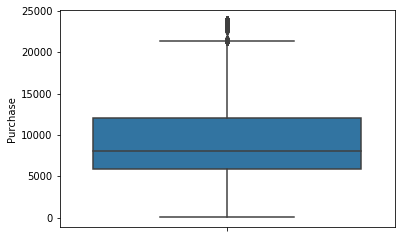

In [21]:
sns.boxplot(y=train['Purchase'])
plt.show()

In [22]:
Q1 = train['Purchase'].quantile(0.25)
Q3 = train['Purchase'].quantile(0.75)
iqr = Q3-Q1

In [23]:
train[train['Purchase']>(Q3 + 1.5*iqr)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
343,1000058,P00117642,1,2,2,1,10,16,17,23603
375,1000062,P00119342,0,3,3,0,10,13,15,23792
652,1000126,P00087042,1,1,9,1,10,14,16,23233
736,1000139,P00159542,0,2,20,2,10,15,16,23595
1041,1000175,P00052842,0,2,2,1,10,15,16,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,1,2,20,1,10,13,16,23753
544704,1005847,P00085342,0,1,4,1,10,13,15,23724
544743,1005852,P00202242,0,2,1,0,10,16,17,23529
545663,1006002,P00116142,1,5,0,2,10,13,16,23663


From the Data shown above, there is a 2677 data point which is shown as outlier data. So we remove them.

In [24]:
outliers = train[train['Purchase']>(Q3+1.5*iqr)]

In [25]:
train_clean = train.drop(outliers.index)

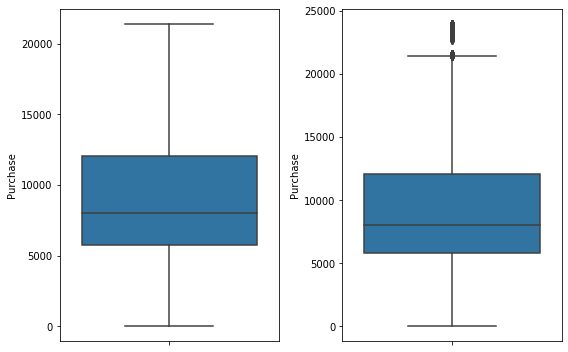

In [26]:
fig, axes = plt.subplots(ncols=2,figsize=(8,5))
sns.boxplot(y=train_clean['Purchase'],ax=axes[0])
sns.boxplot(y=train['Purchase'],ax=axes[1])
plt.tight_layout()
plt.show()

Based on left plot (Clean Data), there is no outlier data compared to the right plot (Old Data). It means the data is clean from outlier point.

---

#### Create Dummy Variable

In [27]:
train_clean.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,3,9,14,8370
1,1000001,P00248942,0,0,10,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,12,9,14,1422
3,1000001,P00085442,0,0,10,0,12,14,16,1057
4,1000002,P00285442,1,6,16,2,8,9,14,7969


In [28]:
train_dumm = train_clean.copy()

In [29]:
train_dumm.drop(columns=['User_ID','Product_ID'], axis=1, inplace=True)

In [30]:
train_dumm.head()

,Gender,Age,Occupation,City_Category,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,3,9,14,8370
1,0,0,10,0,1,6,14,15200
2,0,0,10,0,12,9,14,1422
3,0,0,10,0,12,14,16,1057
4,1,6,16,2,8,9,14,7969


In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
ohe = OneHotEncoder(drop='first')
feat = ohe.fit_transform(train_dumm[['Age', 'City_Category']]).toarray()

In [33]:
len(ohe.get_feature_names(['Age', 'City_Category']))

8

In [34]:
get_feat = ohe.get_feature_names(['Age', 'City_Category'])

In [35]:
feat_new = pd.DataFrame(data=feat,columns=get_feat)
feat_new = feat_new.astype('int64')
feat_new.head()

,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,City_Category_1,City_Category_2
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1


In [36]:
train_dumm = pd.concat([train_dumm,feat_new],axis=1,join='inner')
train_dumm.drop(columns=['Age', 'City_Category'],axis=1,inplace=True)
train_dumm.head()

,Gender,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,City_Category_1,City_Category_2
0,0,10,3,9,14,8370,0,0,0,0,0,0,0,0
1,0,10,1,6,14,15200,0,0,0,0,0,0,0,0
2,0,10,12,9,14,1422,0,0,0,0,0,0,0,0
3,0,10,12,14,16,1057,0,0,0,0,0,0,0,0
4,1,16,8,9,14,7969,0,0,0,0,0,1,0,1


---

## 3. Data Modelling

In [37]:
x = train_dumm.drop('Purchase',axis=1)
y = train_dumm['Purchase']

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [39]:
print(x_train.shape)
print(x_test.shape)

(435771, 13)
(108943, 13)


In [40]:
from sklearn.linear_model import SGDRegressor, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, accuracy_score

In [41]:
kfold = KFold(n_splits=5,shuffle=True,random_state=23)

def rmse_cv(model):
    return (-cross_val_score(model,x_train,y_train,cv=kfold,scoring='neg_root_mean_squared_error')).mean()

In [42]:
#Model 1: Stochastic Gradient Descent
SGD_mod = SGDRegressor()
print('RMSE of SGD Model is: {0}'.format(rmse_cv(SGD_mod)))

#Model 2: Ridge Regression
Ridge_mod = RidgeCV(alphas=[1,0.1,0.001,0.0001,0.0005])
print('RMSE of Ridge Model is: {0}'.format(rmse_cv(Ridge_mod)))

#Model 3: Lasso Regression
Lasso_mod = LassoCV(alphas=[1,0.1,0.001,0.0001,0.0005])
print('RMSE of Lasso Model is: {0}'.format(rmse_cv(Lasso_mod)))

#Model 4: Regression Tree
Tree_mod = DecisionTreeRegressor()
print('RMSE of DT Model is: {0}'.format(rmse_cv(Tree_mod)))

RMSE of SGD Model is: 4670.7219216481735
RMSE of Ridge Model is: 4578.663369750358
RMSE of Lasso Model is: 4578.666051355387
RMSE of DT Model is: 3237.171182142596


### Ensemble Method

In [42]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor

In [44]:
#Model 1: Ada Boost
Ada = AdaBoostRegressor()
print('RMSE of ADA Boost model is: {0}'.format(rmse_cv(Ada)))

#Model 2: Random Forest
RF = RandomForestRegressor()
print('RMSE of RF Boost model is: {0}'.format(rmse_cv(RF)))

#Model 3: Gradient Boosting
GB = GradientBoostingRegressor()
print('RMSE of GB Boost model is: {0}'.format(rmse_cv(GB)))

RMSE of ADA Boost model is: 3653.716770746921
RMSE of RF Boost model is: 3102.300419314163
RMSE of GB Boost model is: 2976.293451579376


As  we can see, Gradient Boost model give a smallest RMSE. So, we choose this model.

---

### Test Model

In [43]:
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred = GB.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

2977.59419548853


---

### Tuning Selected Model

In [42]:
params = {'learning_rate':[0.01,0.05,0.1],
          'n_estimators':[100,150,200,250]
          }

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
GB = GradientBoostingRegressor()
rand = RandomizedSearchCV(GB,param_distributions=params,cv=kfold,scoring='neg_root_mean_squared_error',)
rand.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=23, shuffle=True),
                   error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                

In [46]:
rand.best_params_

{'n_estimators': 250, 'learning_rate': 0.1}

In [47]:
rand.best_score_

-2952.1232229472125

#### Test Tuning Model

In [44]:
tune_GB = GradientBoostingRegressor(learning_rate=0.1,n_estimators=250)
tune_GB.fit(x_train,y_train)
predGB = tune_GB.predict(x_test)
np.sqrt(mean_squared_error(y_test,predGB))

2954.8052552296012

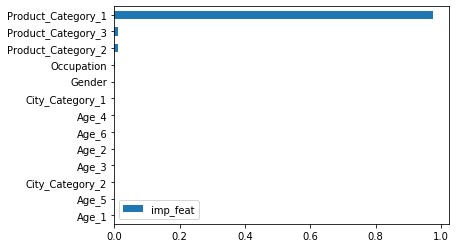

In [46]:
imp_feat = pd.DataFrame(tune_GB.feature_importances_, index=x_train.columns, columns=['imp_feat'])
imp_feat.sort_values(by='imp_feat').plot(kind='barh')
plt.show()

In [50]:
imp_feat.sort_values(by='imp_feat',ascending=False)

,imp_feat
Product_Category_1,0.975870
Product_Category_3,0.012051
Product_Category_2,0.010201
Occupation,0.001634
Gender,0.000139
City_Category_1,0.000025
Age_4,0.000022
Age_6,0.000017
Age_2,0.000015
Age_3,0.000010


## 4. Conclusion

According to feature importance above, we can see that the most influence customer to buy product is the product itself especially Product Category 1. Maybe Product Category 1 contains stuff for daily use like food, drink, etc. Which is very useful for viability. Then followed by type of customers work which determines the amount of revenue to  buy product.